<a href="https://colab.research.google.com/github/thanaphornkanking/test/blob/main/%E0%B9%80%E0%B8%97%E0%B8%AA%E0%B9%82%E0%B8%A1%E0%B9%80%E0%B8%94%E0%B8%A5damage(500)%E0%B8%81%E0%B8%B1%E0%B8%9A%E0%B9%82%E0%B8%A1%E0%B9%80%E0%B8%94%E0%B8%A5(id12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

In [3]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
Cloning into 'efficientnet_keras_transfer_learning'...
remote: Enumerating objects: 1100, done.
remote: Counting objects: 100% (263/263), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 1100 (delta 133), reused 241 (delta 121), pack-reused 837
Receiving objects: 100% (1100/1100), 14.10 MiB | 22.07 MiB/s, done.
Resolving deltas: 100% (630/630), done.
/content/efficientnet_keras_transfer_learning


In [4]:
df = pd.read_csv (r'/content/drive/MyDrive/รูปรถทั้งหมด(old)/id_all_car99.csv')
df

,no,id,Degree,Part,Path_Name
0,1,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
1,2,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
2,3,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
3,4,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
4,5,id2,Base,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id2/B...
...,...,...,...,...,...
199837,199838,id99,Base,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...
199838,199839,id99,Base,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...
199839,199840,id99,Base,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...
199840,199841,id99,Base,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...


In [5]:
import sys
sys.path.append('/content/drive/MyDrive/Model/damage_id14(500).h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [6]:
#load model
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/Model/damage_id14(500).h5')
height = width = model.input_shape[1]

In [7]:
DATA_PATH = "/content/drive/My Drive/id"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'test')
print(test_dir)

/content/drive/My Drive/id/train
/content/drive/My Drive/id/test


In [8]:
train = df[df['no'].between(0,146362)]
test = df[df['no'].between(146363,199842)]

In [9]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_Name',
        y_col = 'Degree',
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')


#label
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

Found 146362 validated image filenames belonging to 7 classes.
{0: 'Base', 1: 'Minor', 2: 'Moderate', 3: 'Severe', 4: 'minor', 5: 'moderate', 6: 'severe'}


In [10]:
test = df[df['no'].between(146363,199842)]
test

,no,id,Degree,Part,Path_Name
146362,146363,id99,Moderate,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...
146363,146364,id99,Moderate,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...
146364,146365,id99,Moderate,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...
146365,146366,id99,Moderate,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...
146366,146367,id99,Moderate,p01,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...
...,...,...,...,...,...
199837,199838,id99,Base,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...
199838,199839,id99,Base,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...
199839,199840,id99,Base,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...
199840,199841,id99,Base,p15,/content/drive/MyDrive/รูปรถทั้งหมด(old)/id99/...


In [11]:
act = test['Degree'].tolist() #ค่าจริง
path = test['Path_Name'].tolist() #path

In [12]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path): #สร้างฟังก์ชัน
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตาม พารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img) # model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [13]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = np.argmax(predict)
    pred_list.append(labels[result])
    prob_list.append(predict[result])

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
1/1 [==============================] - 0s 81ms/step


In [14]:
pred_list

['Moderate',
 'Moderate',
 'Minor',
 'Minor',
 'Moderate',
 'Minor',
 'Minor',
 'Moderate',
 'Moderate',
 'Minor',
 'Moderate',
 'Moderate',
 'Moderate',
 'Minor',
 'Minor',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Minor',
 'Moderate',
 'Moderate',
 'Moderate',
 'Minor',
 'Minor',
 'Moderate',
 'Moderate',
 'Moderate',
 'Minor',
 'Minor',
 'Minor',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Moderate',
 'Minor',
 'Minor',
 'Minor',
 'Moderate',
 'Minor',
 'Moderate',
 'Minor',
 'Minor',
 'Minor',
 'Moderate',
 'Moderate',
 'Minor',
 'Moderate',
 'Moderate',
 'Minor',
 'Moderate',
 'Moderate',
 'Minor',
 'Minor',
 'Minor',
 'Minor',
 'Moderate',
 'Minor',
 'Moderate',
 'Minor',
 'Moderate',
 'Minor',
 'Moderate',
 'Minor',
 'Minor',
 'Moderate',
 'Moderate',
 'Minor',
 'Moderate',
 'Moderate',
 'Minor',
 'Minor',
 'Minor',
 'Minor',
 'Minor',
 'Minor',
 'Moderate',
 'Moderate',
 'Moderate',
 'Minor',
 'Minor',
 'Moderate',
 '

In [15]:
pred = np.array(pred_list)
act = np.array(act)

In [16]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 25.484293193717278%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

        Base       0.00      0.00      0.00     13380
       Minor       0.26      0.24      0.25     13365
    Moderate       0.25      0.60      0.35     13367
      Severe       0.28      0.18      0.22     13368

    accuracy                           0.25     53480
   macro avg       0.20      0.25      0.20     53480
weighted avg       0.20      0.25      0.20     53480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

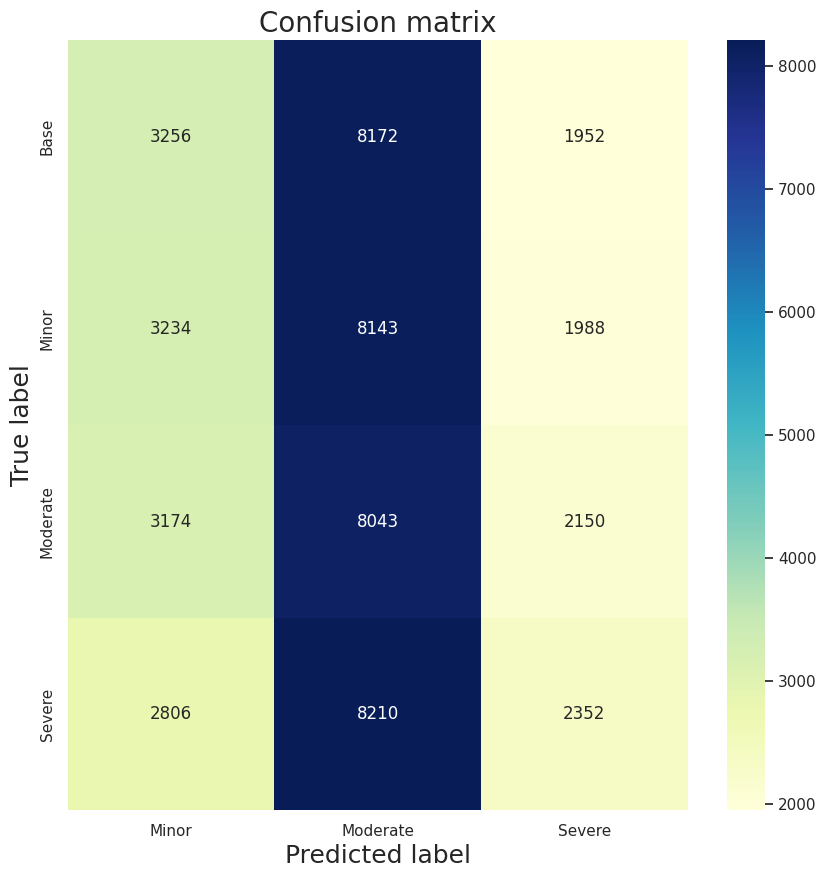

In [17]:
#create CF
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)